# Iris Flower

using KNN Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_df=pd.read_csv('IRIS.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Feature Selection

In [8]:
X=iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
y=iris_df['species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## Normalizing

In [19]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype(float))

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)
print(f'Train Set: {X_train.shape,y_train.shape}')
print(f' Test Set: {X_test.shape,y_test.shape}')

Train Set: ((120, 4), (120,))
 Test Set: ((30, 4), (30,))


## Modelling and Predicting

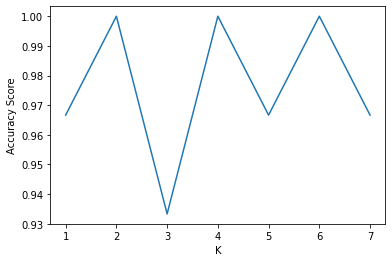

The best accuracy 1.0 is achieved at K = 2


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ks=8
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    knn=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_hat=knn.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_hat,y_test)
    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    
plt.plot(range(1,Ks),mean_acc)
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

print(f'The best accuracy {round(mean_acc.max(),2)} is achieved at K = {mean_acc.argmax()+1}')

In [40]:
best_k=mean_acc.argmax()+1
knn=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
y_hat=knn.predict(X_test)
y_hat

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)